In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 3 - Masked arrays

## 3.1 Masked arrays

Sometimes you have an array with *invalid* values, or values you for want to omit, for one reason or another.

One option is to create a boolean mask as we have previously seen.


In [2]:
a = np.array([5, 2, 1, -1, 2.0]) # -1 is an invalid entry, an error in measurement for example.

In [3]:
i = a>=0
i

array([ True,  True,  True, False,  True])

In [4]:
a[i].mean()

2.5

But another, more neat option, is to create an *masked array*.

In [5]:
b = np.ma.masked_array(a, a<0) # second argument is the mask, True for values that you *dont*  want
b

masked_array(data=[5.0, 2.0, 1.0, --, 2.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

Now the array has the information of which values to omit *inside* the array, it is not another variable.

Every operation you do with the array will consider the mask and omit those values.

In [6]:
b.mean()

2.5

Another way of creating masked arrays is using some specific functions from the module  
- ```np.ma.greater```, ```np.ma.greater_equal``` 
- ```np.ma.less```, ```np.ma.less_equal```
- ```np.ma.masked_outside```
- ```np.ma.masked_inside```
- ```np.ma.masked_invalid``` marks NaNs as masked.
... etc


In [7]:
a

array([ 5.,  2.,  1., -1.,  2.])

In [8]:
np.ma.masked_less(a, 0)

masked_array(data=[5.0, 2.0, 1.0, --, 2.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

Accessing the full data is easy with the attribute ```data```

In [9]:
b.data

array([ 5.,  2.,  1., -1.,  2.])

and the mask with attribute ```mask```

In [10]:
b.mask

array([False, False, False,  True, False])

Modifying the mask: setting a new value to be masked by assigning ```np.ma.masked```

In [11]:
b[0] = np.ma.masked

In [12]:
b

masked_array(data=[--, 2.0, 1.0, --, 2.0],
             mask=[ True, False, False,  True, False],
       fill_value=1e+20)

Unmasking by assigning the original value 

In [13]:
b[0]=b.data[0]

In [14]:
b

masked_array(data=[5.0, 2.0, 1.0, --, 2.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

Slicing and indexing works as you would expect, omiting masked values

In [15]:
b[2:].mean()

1.5

All *ufuncs* work as expected, ignoring the masked values (despite warning...)

In [16]:
l = np.log(b)
#np.ma.masked_invalid(np.log(a))


/tmp/ipykernel_73910/1512873993.py:1: RuntimeWarning: invalid value encountered in log
  l = np.log(b)


In [17]:
np.sum(l)

2.995732273553991

In [18]:
np.sum(np.log(b[i]))

2.995732273553991

Numerical operations can be easily performed without worrying about missing values, dividing by zero, square roots of negative numbers, etc.

In [19]:
x = np.ma.array([1., -1., 3., 4., 5., 6.], mask=[0,0,0,0,1,0])
y = np.ma.array([1., 2., 0., 2., 5., 6.], mask=[0,0,0,0,0,1])

print(np.ma.sqrt(x/y))

[1.0 -- -- 1.4142135623730951 -- --]


# Exercises

### Exercise 1

- Create a vector of 1000 random samples that are normally distributed with mean 0 and standard deviation of 1. Use ```np.random.normal``` for it (consult the documentation of the function if needed, by typing ```np.random.normal?```).

- Mask all the samples above and below the mean +- 1 standard deviation.
- Visualize the distribution of samples before and after so that you can compare them. Pass the arrays (normal or masked) to the  histogram function ``hist()`` in matplotlib)


In [20]:
# you code here

### Exercise 2

We will create a circular mask and apply it to the following image. Then we will compute the mean gray value over rows or over columns for only the circular center. The image is already loaded in numpy array ```img```.

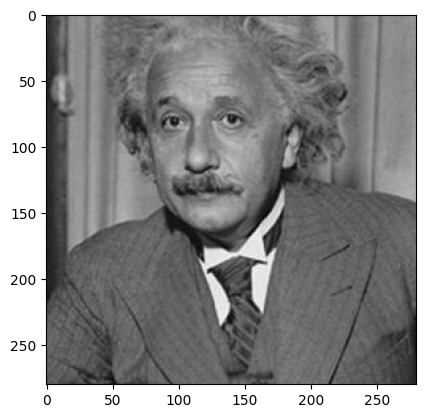

In [21]:
from PIL import Image

img = np.asarray(Image.open('imgs/einstein.png').convert('L'))
plt.imshow(img, cmap='gray')


Step 1. Create a circular mask as shown below. Size of the array should be the same as the image. You can choose the radius, here shown is a radius of 100 pixels.

![imgs/mask.png](imgs/mask.png)

In [22]:
# your code here


Step 2: create a masked array, using the circular mask and applying it to the image.

In [23]:
# your code here


Step 3: visualize the masked image with ```plt.imshow```.



In [24]:
# your code here


Final step: compute the mean value across both axis independently, that is, the means taken horizontally and taken vertically. Visualize the distribution as a histogram.

In [25]:
# your code here


---